<a href="https://colab.research.google.com/github/elangptra/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Praktikum 5 - Pertemuan 6**

Nama: Elang Putra Adam

Kelas: TI 3G

NIM: 2141720074

# **Tugas Praktikum**

1. Buat Gamma Correction sesuai dengan petunjuk berikut

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.



```
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
print('Error, not a number')
```



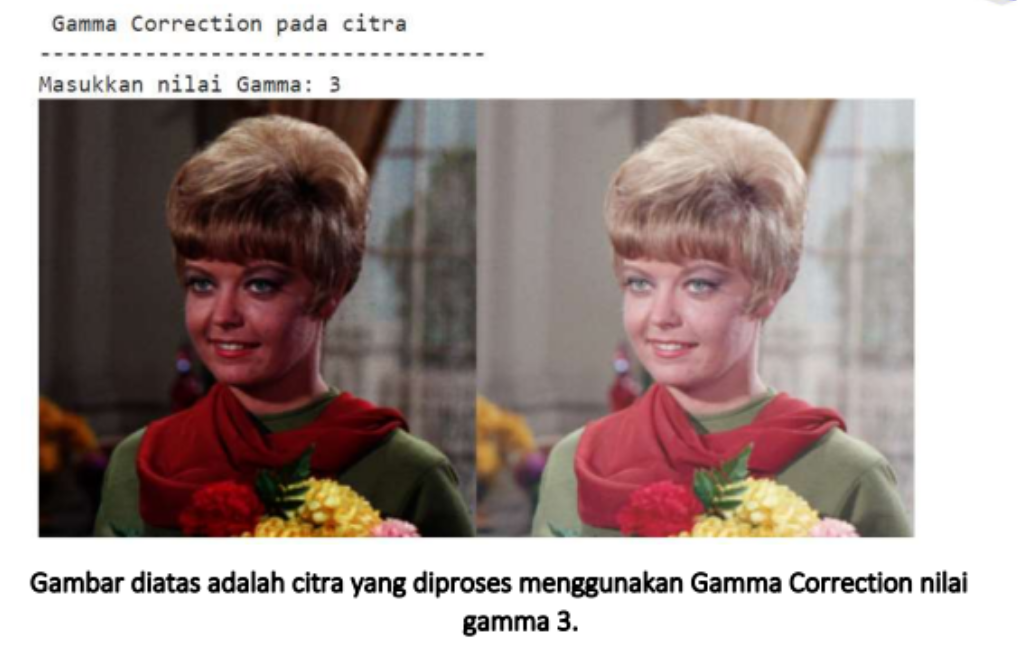

Jawab:

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


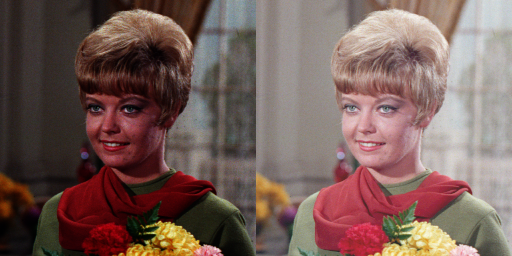

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.



```
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
```



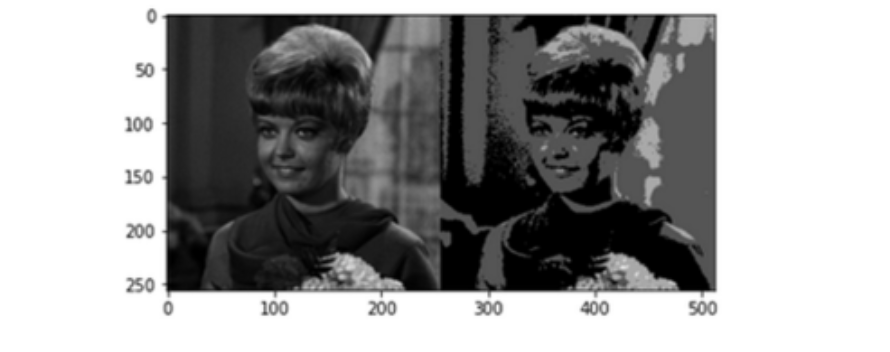

Jawab:

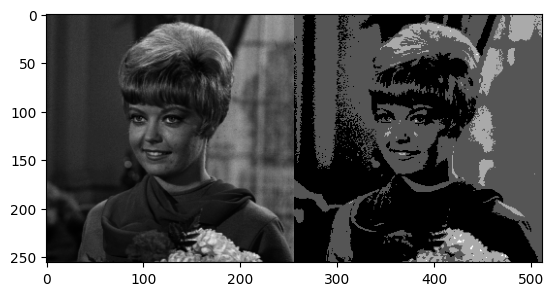

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')

3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub babsebelumnya.

Citra asli sudah disediakan pada /images/galaxy.jpg.

100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob).



```
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/noises/*.jpg'):
n= cv.imread(img)
cv_img.append(n)
```



Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
menggunakan cv_img[0], cv_img[1], dst.

Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan anda:

Jawab:

Nilai PSNR untuk Jumlah Citra di Average 5 adalah 27.53569953210009 (dB)


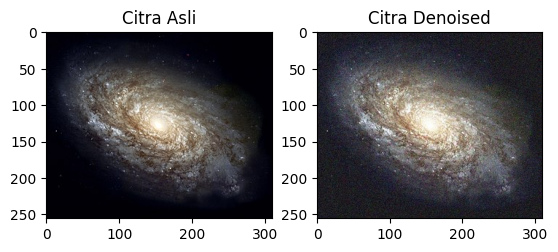



Nilai PSNR untuk Jumlah Citra di Average 10 adalah 27.552962301350647 (dB)


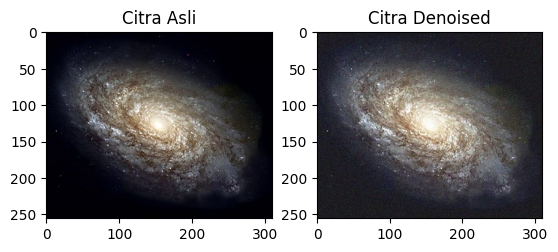



Nilai PSNR untuk Jumlah Citra di Average 20 adalah 27.538716924536047 (dB)


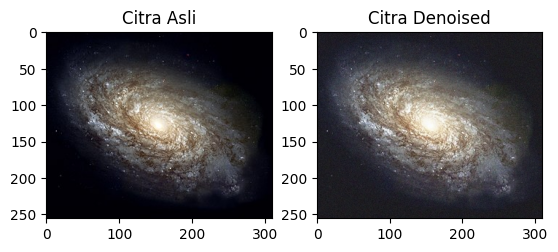



Nilai PSNR untuk Jumlah Citra di Average 40 adalah 27.501204122852748 (dB)


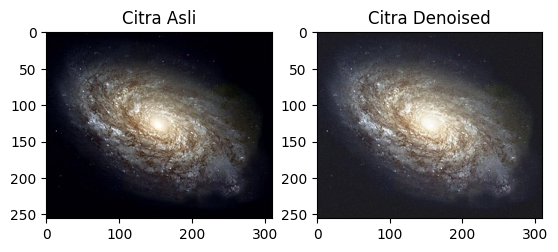



Nilai PSNR untuk Jumlah Citra di Average 80 adalah 27.502437331367595 (dB)


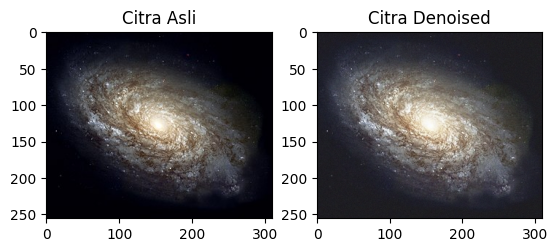



Nilai PSNR untuk Jumlah Citra di Average 100 adalah 27.508709164020544 (dB)


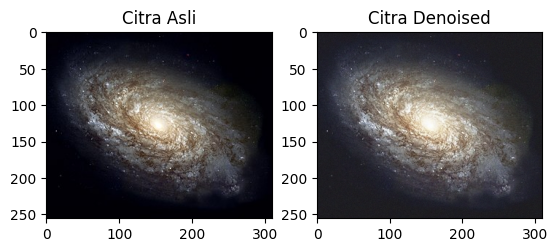

In [9]:
import cv2 as cv
import glob
from math import log10, sqrt
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/galaxy.jpg')
cv_img = []

for img in glob.glob('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Daftar nilai noise_number yang ingin digunakan
noise_numbers = [4, 9, 19, 39, 79, 99]

for i in noise_numbers:
    dst = cv_img[0]

    for j in range(1, i):
        alpha = 1.0 / (j + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[j], alpha, dst, beta, 0.0)

    def PSNR(original, compressed):
        mse = np.mean((original - compressed) ** 2)
        if mse == 0:
            return 100
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse))
        return psnr

    compressed = dst
    psnr = PSNR(original, compressed)

    print(f'Nilai PSNR untuk Jumlah Citra di Average {i+1} adalah {psnr} (dB)')

    # Menampilkan citra dengan matplotlib
    plt.subplot(121), plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB)), plt.title('Citra Asli')
    plt.subplot(122), plt.imshow(cv.cvtColor(compressed, cv.COLOR_BGR2RGB)), plt.title('Citra Denoised')
    plt.show()

    print('\n')

Kesimpulan:

Kode di atas digunakan untuk mengukur efektivitas metode denoising rata-rata pada berbagai jumlah citra rata-rata. Semakin banyak citra yang digunakan dalam proses perataan rata-rata, semakin tinggi nilai PSNR-nya, yang mengindikasikan bahwa denoising rata-rata lebih efektif dalam mengurangi noise pada citra. Dengan kata lain, semakin banyak citra yang digunakan, semakin baik kualitas hasil denoisingnya.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

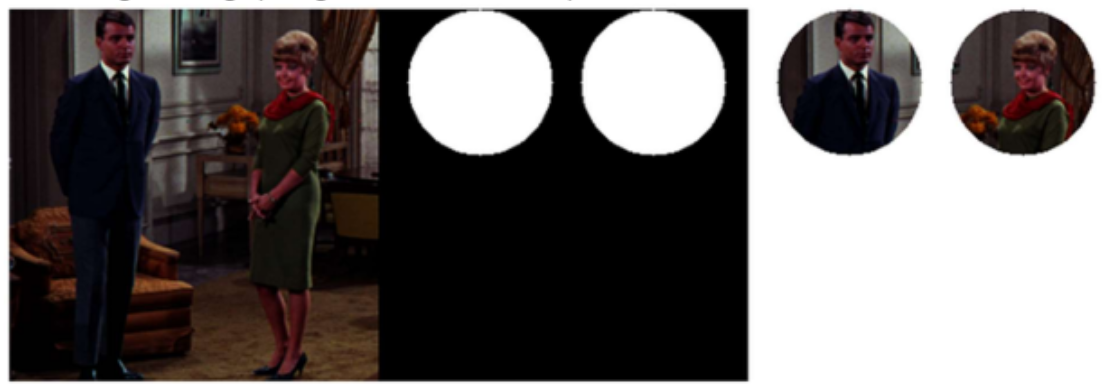

Jawab:

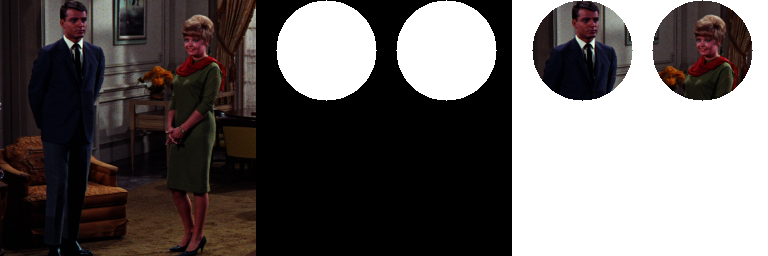

In [78]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

# result = img & mask & mask2
result = cv.bitwise_and(img, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

Jawab:

* Operator Or

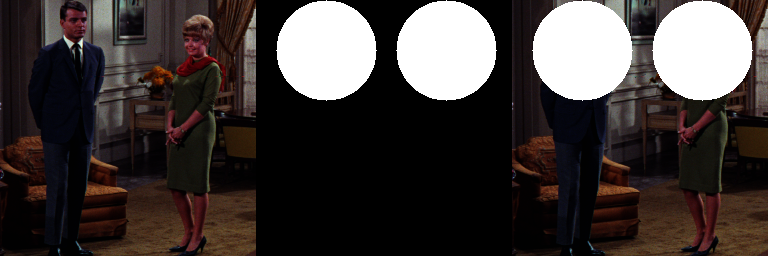

In [76]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

# result = img | mask | mask2
result = cv.bitwise_or(img, mask)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

* Operator Not

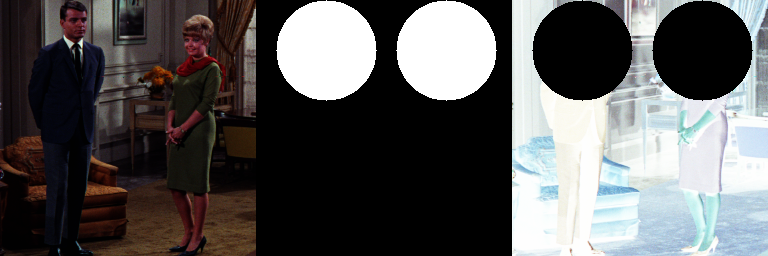

In [74]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~img & ~mask & ~mask2

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

* Operator Nand

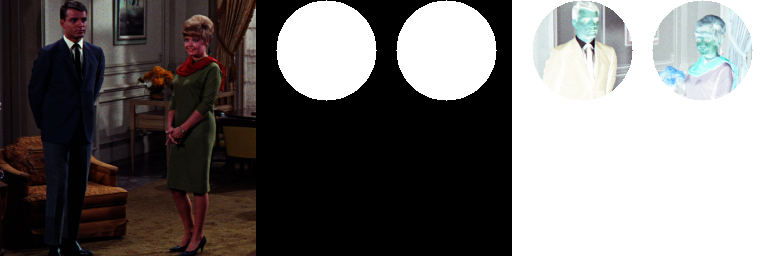

In [80]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~(img & mask & mask2)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

* Operator Xor

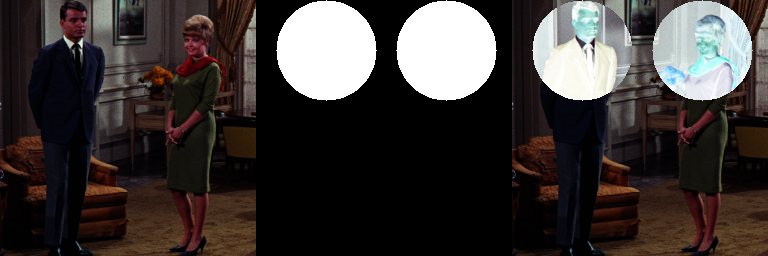

In [83]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = cv.bitwise_xor(img, mask)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

Tuliskan hasil analisa anda:

Pada kode di atas, perubahan operator menghasilkan perbedaan dalam pemrosesan gambar antara citra asli dan dua mask lingkaran. Jika menggunakan and (&), akan memisahkan atau mask gambar dengan keluaran yang sama tanpa perubahaan warna. Jika menggunakan or (|), akan menghasilkan keluaran mask tanpa menampilkan output gambar. Sedangkan untuk operator not (~) digunakan untuk membalikkan mask sehingga citra hitam berubah menjadi putih ataupun sebaliknya. Untuk Nand dan Xor hasilnya mirip dengan and dan or, yang membedakan hanya terdapat fungsi not yang membalikan warna sehingga output yang dikeluarkan warnanya berubah.